# Chapter 2 – Individual Exercise 1: Decision Tree

Name: Mirang Bhandari <br>
Matriculation Number: 100007049

This notebook compares Decision Tree, Random Forest, and Extra Trees regressors on a real-world housing dataset from Kaggle.<br>
Source: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Load and Prepare the Dataset

In [2]:

# Load dataset
data = pd.read_csv('../Datasets/Housing.csv')

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Evaluation Function

In [3]:

def evaluate_model(model, X_test, y_test):
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    return preds, mse, rmse, r2


## Decision Tree Regressor

Decision Tree Results
MSE: 2642802637614.6787
RMSE: 1625669.904259373
R2: 0.4771459275854347


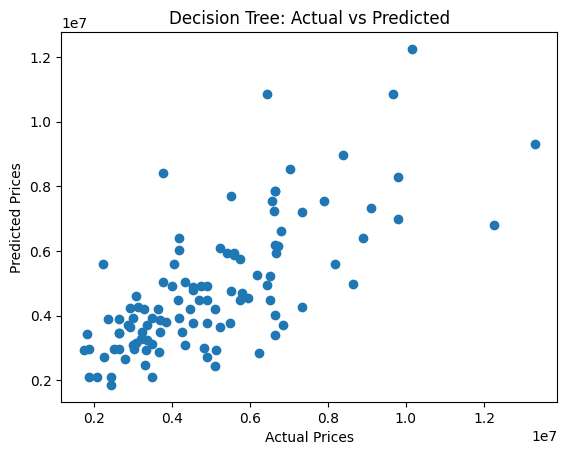

In [4]:

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_preds, dt_mse, dt_rmse, dt_r2 = evaluate_model(dt, X_test, y_test)

print("Decision Tree Results")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R2:", dt_r2)

plt.scatter(y_test, dt_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted")
plt.show()


## Random Forest Regressor

Random Forest Results
MSE: 1961585044320.3433
RMSE: 1400565.9728553821
R2: 0.611918531405699


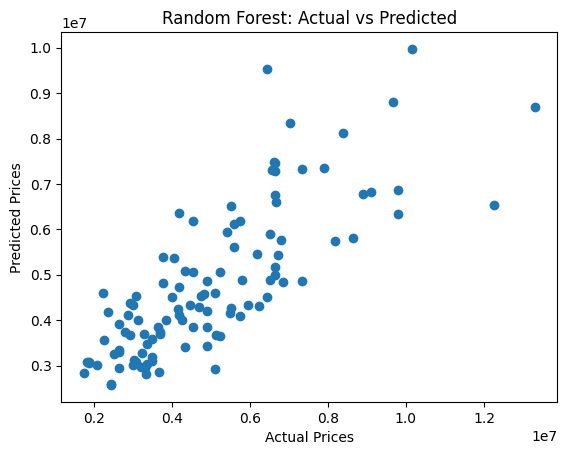

In [5]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_preds, rf_mse, rf_rmse, rf_r2 = evaluate_model(rf, X_test, y_test)

print("Random Forest Results")
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R2:", rf_r2)

plt.scatter(y_test, rf_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


## Extra Trees Regressor

Extra Trees Results
MSE: 1926665328564.8828
RMSE: 1388043.7055672572
R2: 0.6188270743783898


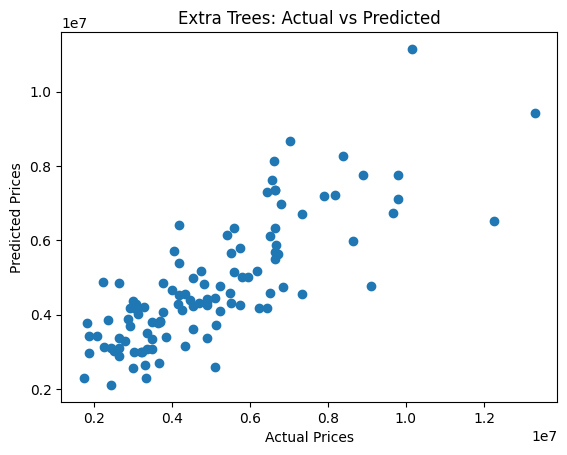

In [6]:

et = ExtraTreesRegressor(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

et_preds, et_mse, et_rmse, et_r2 = evaluate_model(et, X_test, y_test)

print("Extra Trees Results")
print("MSE:", et_mse)
print("RMSE:", et_rmse)
print("R2:", et_r2)

plt.scatter(y_test, et_preds)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Extra Trees: Actual vs Predicted")
plt.show()



## Model Comparison and Discussion

- **Decision Tree**: Simple but prone to overfitting and high variance.
- **Random Forest**: Averages many trees, reducing overfitting and improving generalization.
- **Extra Trees**: Adds more randomness, often achieving the best test performance.

Overall, ensemble methods outperform a single decision tree on this regression task.
